## Random Forest (ChiaHui)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Part A - Model Variety Training

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Import Dataframe

In [3]:
df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")
df_raw

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3000\4099694473.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")


,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,11/4/2021 0:00,7/11/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,10/12/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,3/10/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0                   1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

### Data Preparetion 
#### Map each Crime commited to a maytching criminal offense

In [5]:
# Keyword-based mapping rules for auto‐labeling
mapping_rules = {
    "Violent Crime": [
        "ASSAULT", "BATTERY", "HOMICIDE", "MANSLAUGHTER", "RAPE",
        "SEXUAL", "SODOMY", "ORAL COPULATION", "KIDNAPPING",
        "LYNCHING", "STALKING", "THREATS", "INTIMATE PARTNER"
    ],
    "Property Crime": [
        "THEFT", "BURGLARY", "VANDALISM", "ARSON", "SHOPLIFTING",
        "BIKE - STOLEN", "COIN MACHINE"
    ],
    "Vehicle Crime": [
        "VEHICLE", "DRIVING WITHOUT OWNER CONSENT", "DWOC"
    ],
    "Fraud / Financial Crime": [
        "FRAUD", "EMBEZZLEMENT", "COUNTERFEIT", "BUNCO",
        "CREDIT CARD", "DOCUMENT WORTHLESS", "INSURANCE"
    ],
    "Weapons / Public Safety": [
        "FIREARM", "WEAPON", "SHOTS FIRED", "BOMB", "BRANDISH"
    ],
    "Sex Crime": [
        "LEWD", "INDECENT EXPOSURE", "CHILD PORNOGRAPHY",
        "PANDERING", "PIMPING", "HUMAN TRAFFICKING"
    ],
    "Child-Related Crime": [
        "CHILD", "CONTRIBUTING", "CHILD NEGLECT"
    ],
    "Court / Restraining Order / Legal": [
        "COURT", "RESTRAINING", "CONTEMPT", "FAILURE TO APPEAR",
        "VIOLATION"
    ],
    "Public Disturbance / Disorder": [
        "DISTURBANCE", "PEACE", "TRESPASS", "DISRUPT",
        "RIOT", "DISOBEY"
    ],
    "Other Crime": []  # fallback
}

# Function to classify crimes
def classify(description: str):
    if not isinstance(description, str):
        return "Other Crime"
    desc = description.upper()
    for category, keywords in mapping_rules.items():
        for kw in keywords:
            if kw in desc:
                return category
    return "Other Crime"

# Create new class column
df_raw["Crime_Class"] = df_raw["Crm Cd Desc"].apply(classify)

# Save a preview
preview = df_raw[["Crm Cd Desc", "Crime_Class"]].head(30)
preview

,Crm Cd Desc,Crime_Class
0,THEFT OF IDENTITY,Property Crime
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Violent Crime
2,THEFT OF IDENTITY,Property Crime
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,Property Crime
4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),Property Crime
5,THEFT OF IDENTITY,Property Crime
6,THEFT OF IDENTITY,Property Crime
7,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,Other Crime
8,THEFT OF IDENTITY,Property Crime
9,THEFT OF IDENTITY,Property Crime


In [6]:

df_raw['Crime_Class'].value_counts().reset_index(name='Count')

,Crime_Class,Count
0,Property Crime,508444
1,Violent Crime,233487
2,Vehicle Crime,123445
3,Other Crime,63036
4,Court / Restraining Order / Legal,21771
5,Public Disturbance / Disorder,19977
6,Weapons / Public Safety,19431
7,Sex Crime,11870
8,Child-Related Crime,2784
9,Fraud / Financial Crime,746


### Category: Machine Learning Models

#### Tree Based: Random Forest Tree (RAW)

In [7]:
print("=== Random Forest Crime Classification ===")

# Remove Crm Cd Desc to avoid leakage
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, class_names = pd.factorize(df_model["Crime_Class"])

# Convert datetime columns to int timestamps
for col in X.select_dtypes(include=['datetime', 'datetimetz']).columns:
    X[col] = X[col].view('int64')

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize Random Forest with balanced, regularized params
rf_model_1 = RandomForestClassifier()
# Save paraneter tunning for PART B. 

rf_model_1.fit(X_train, y_train)

# Predictions
y_pred_test_1 = rf_model_1.predict(X_test)
y_pred_train_1 = rf_model_1.predict(X_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("\n=== Performance ===")
print(f"Training Set Accuracy: {train_accuracy}")
print(f"Testing Set Accuracy:  {test_accuracy}")
print(f"Overfit Gap:          {train_accuracy - test_accuracy:.4f}")

# Evaluation reports
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

=== Random Forest Crime Classification ===

=== Performance ===
Training Set Accuracy: 0.9998734884355637
Testing Set Accuracy:  0.8596209593430139
Overfit Gap:          0.1403
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.999944  0.999882  0.999913  355910.000000
1              0.999927  1.000000  0.999963  163441.000000
2              0.999864  0.999320  0.999592   44125.000000
3              0.999422  0.999826  0.999624   86411.000000
4              0.999926  1.000000  0.999963   13602.000000
5              1.000000  1.000000  1.000000    8309.000000
6              1.000000  1.000000  1.000000   15240.000000
7              1.000000  0.999857  0.999928   13984.000000
8              1.000000  1.000000  1.000000     522.000000
9              1.000000  1.000000  1.000000

### Part A - Feature Engineering and Transformation

#### Data Cleaning (Check for duplicate)

In [8]:
df_new = df_raw.drop_duplicates()
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,11/4/2021 0:00,7/11/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,10/12/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,3/10/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


In [9]:
df_new = df_new.drop(columns=["Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"])
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,...,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,11/4/2021 0:00,7/11/2020 0:00,845,15,N Hollywood,1502,2,377,31,...,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,...,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,10/12/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,377,30,...,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,344,47,...,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,3/10/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,1300 0344 1606 2032,63,...,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,NaN,35,...,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,1258 0553 0602,11,...,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,NaN,16,...,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,0400 1259 1822 0356,17,...,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


### Standardization

In [10]:
# 1. Clean DATE OCC (mixed formats)
df_new['DATE OCC'] = pd.to_datetime(df_new['DATE OCC'], format='mixed', errors='coerce')

# 2. Clean TIME OCC (force numeric → Int64 → 4-digit HHMM)
df_new['TIME OCC'] = pd.to_numeric(df_new['TIME OCC'], errors='coerce').astype('Int64')
time_str = df_new['TIME OCC'].astype(str).str.zfill(4)

# 3. Combine DATE OCC + TIME OCC into a single datetime
df_new['DateTime OCC'] = pd.to_datetime(
    df_new['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + time_str,
    errors='coerce'
)

# 4. Drop the original columns used for merging
df_new = df_new.drop(columns=['DATE OCC', 'TIME OCC'])

df_new

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,211507896,11/4/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-07-11 08:45:00
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,240913563,10/12/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,201418201,3/10/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


### Check Null Value 


In [11]:
df_new.isna().sum()

                       0
Date Rptd              0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Mocodes           151619
Vict Age               0
Vict Sex          144644
Vict Descent      144656
Weapon Used Cd    677744
Weapon Desc       677744
Status                 1
Status Desc            0
LOCATION               0
Cross Street      850755
LAT                    0
LON                    0
Crime_Class            0
DateTime OCC           0
dtype: int64

Remove the Weapon Used Cd column, and change the Weapon Desc column to binary.

In [12]:
# 1. Drop the Weapon Used Cd column (if it exists)
df_new = df_new.drop(columns=['Weapon Used Cd'], errors='ignore')

# 2. Create a binary Weapon_Present column
df_new['Weapon_Present'] = df_new['Weapon Desc'].apply(
    lambda x: 'Present' if pd.notna(x) and str(x).strip() != '' else 'Absent'
)

# 3. (Optional) Drop Weapon Desc if you want to fully remove the text info
df_new = df_new.drop(columns=['Weapon Desc'], errors='ignore')

df_new

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC,Weapon_Present
0,211507896,11/4/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-07-11 08:45:00,Absent
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00,Present
2,240913563,10/12/2024 0:00,9,Van Nuys,933,2,377,30,M,W,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00,Absent
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00,Absent
4,201418201,3/10/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00,Absent
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00,Absent
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00,Absent
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00,Present


Dropping columns that provide meaningless value:

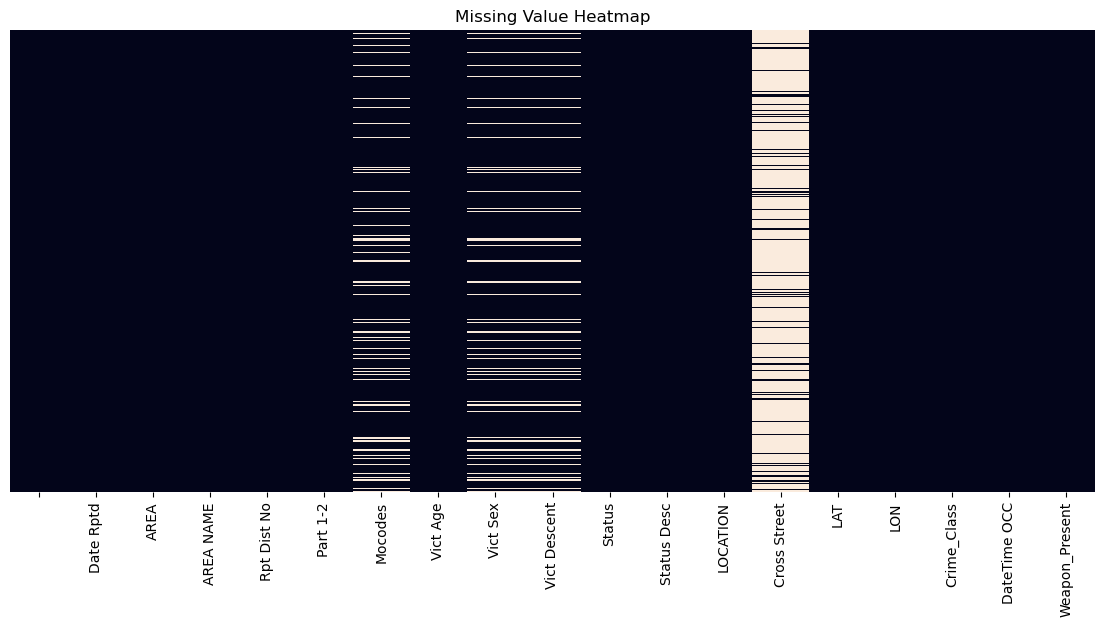

In [13]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

### Test Pearson Correlation (Numeric Features)


Top 25 strongest Pearson correlations (absolute):
      Feature 1            Feature 2  Correlation
7          AREA          Rpt Dist No     0.999051
25          LAT                  LON    -0.998190
18     Part 1-2             Vict Age     0.206183
24     Vict Age  Crime_Class_numeric    -0.081723
21     Part 1-2  Crime_Class_numeric     0.071209
3                           Vict Age    -0.067490
4                                LAT     0.046381
5                                LON    -0.045180
6                Crime_Class_numeric    -0.044521
2                           Part 1-2    -0.039367
1                        Rpt Dist No     0.034373
0                               AREA     0.034086
20     Part 1-2                  LON     0.029212
19     Part 1-2                  LAT    -0.028722
10         AREA                  LAT     0.025338
15  Rpt Dist No                  LAT     0.025077
14  Rpt Dist No             Vict Age     0.022624
9          AREA             Vict Age     0.022593


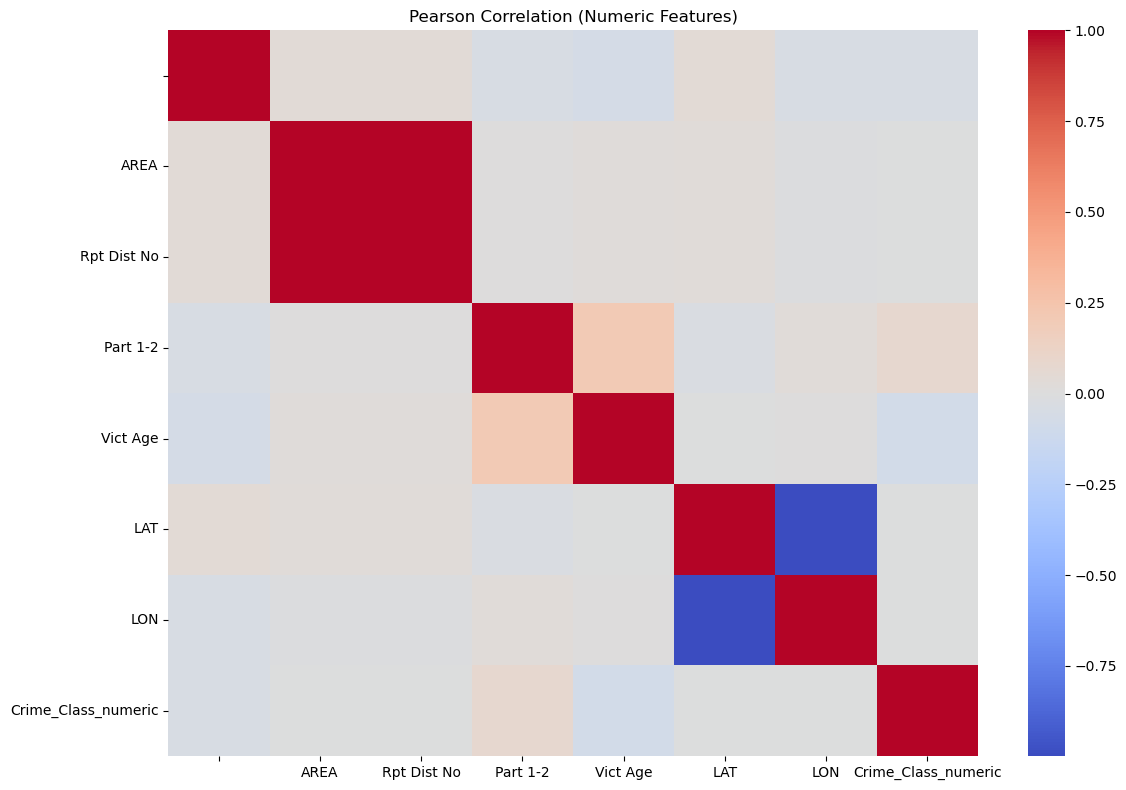

In [14]:
# Choose the DataFrame to analyze; use the most recent processed one if available
try:
    df_corr_source = df_new.copy()
except NameError:
    df_corr_source = df_raw.copy()

# Ensure target encoding (optional): demonstrate correlation against encoded target when present
if 'Crime_Class' in df_corr_source.columns:
    df_corr_source['Crime_Class_numeric'] = df_corr_source['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr_source.select_dtypes(include=['number'])

# Pearson correlation matrix
corr = num_df.corr(numeric_only=True)

# Upper triangle flatten for pairwise sorted report
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
corr_report = (
    upper.stack()
          .reset_index()
          .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# Sort by absolute correlation strength
corr_report = corr_report.iloc[corr_report['Correlation'].abs().sort_values(ascending=False).index]

# Show top pairs
print("Top 25 strongest Pearson correlations (absolute):")
print(corr_report.head(25))

# Optional: heatmap for a quick visual
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Pearson Correlation (Numeric Features)')
plt.tight_layout()
plt.show()

In [15]:
# Select only numeric columns
num_df_new = df_new.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = num_df_new.corr(numeric_only=True)

# Turn it into a sorted report (pairwise correlations)
corr_report = (
    corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  # keep upper triangle
        .stack()
        .reset_index()
)
corr_report.columns = ["Feature 1", "Feature 2", "Correlation"]

# Sort by absolute correlation strength
corr_report = corr_report.iloc[corr_report['Correlation'].abs().sort_values(ascending=False).index]

corr_report.head(20)   # view top 20 strongest relationships

,Feature 1,Feature 2,Correlation
6,AREA,Rpt Dist No,0.999051
20,LAT,LON,-0.998190
15,Part 1-2,Vict Age,0.206183
3,,Vict Age,-0.067490
4,,LAT,0.046381
5,,LON,-0.045180
2,,Part 1-2,-0.039367
1,,Rpt Dist No,0.034373
0,,AREA,0.034086
17,Part 1-2,LON,0.029212


In [16]:
# Make a copy of the data
df_corr = df_new.copy()

# Convert Crime_Class (categorical) → numeric labels
df_corr['Crime_Class_numeric'] = df_corr['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr.select_dtypes(include=['number'])

# Compute correlation with the numeric-encoded target
target_corr = num_df.corr(numeric_only=True)['Crime_Class_numeric']

# Remove the target itself
target_corr = target_corr.drop(labels=['Crime_Class_numeric'])

# Turn into sorted dataframe
target_corr_report = (
    target_corr
        .abs()
        .sort_values(ascending=False)
        .rename("Correlation_with_Crime_Class")
        .to_frame()
)

target_corr_report.head(20)

,Correlation_with_Crime_Class
Vict Age,0.081723
Part 1-2,0.071209
,0.044521
Rpt Dist No,0.003770
AREA,0.003678
LAT,0.001563
LON,0.001106


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0                   1004991 non-null  int64         
 1   Date Rptd       1004991 non-null  object        
 2   AREA            1004991 non-null  int64         
 3   AREA NAME       1004991 non-null  object        
 4   Rpt Dist No     1004991 non-null  int64         
 5   Part 1-2        1004991 non-null  int64         
 6   Mocodes         853372 non-null   object        
 7   Vict Age        1004991 non-null  int64         
 8   Vict Sex        860347 non-null   object        
 9   Vict Descent    860335 non-null   object        
 10  Status          1004990 non-null  object        
 11  Status Desc     1004991 non-null  object        
 12  LOCATION        1004991 non-null  object        
 13  Cross Street    154236 non-null   object        
 14  LAT             10

### Mocodes

In [18]:
# --- Step 1: Clean & explode the MO Codes column ---
# Convert NaN to empty string
df_new['Mocodes'] = df_new['Mocodes'].fillna('')

# Split by spaces → expand into list
df_new['MOCODES_LIST'] = df_new['Mocodes'].str.strip().str.split()

# Explode (each code becomes a row)
exploded = df_new.explode('MOCODES_LIST')

In [19]:
all_codes = sorted({code for sublist in df_new['MOCODES_LIST'] for code in sublist})
print(len(all_codes), "unique MO codes found")

938 unique MO codes found


In [20]:
# --- Step 2: Count MO code frequencies ---
mo_counts = (
    exploded['MOCODES_LIST']
    .value_counts()
)

In [21]:
# --- Step 3: Select the Top 100 codes ---
top_100 = set(mo_counts.head(100).index)

In [22]:
# --- Step 4: Create one-hot columns for each top code ---
for code in top_100:
    df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)

# --- Step 5: Create the OTHERS column ---
# OTHERS = true if the row contains any MO code NOT in the top 100
df_new['MO_OTHERS'] = df_new['MOCODES_LIST'].apply(
    lambda lst: any(code not in top_100 for code in lst)
)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3000\3894850352.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3000\3894850352.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3000\3894850352.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

In [23]:
# --- Step 6: Convert booleans to integers (0/1) ---
mo_cols = [col for col in df_new.columns if col.startswith("MO_")]
df_new[mo_cols] = df_new[mo_cols].astype(int)

# --- Step 7: Clean up temporary column ---
df_new_1 = df_new.drop(columns=["MOCODES_LIST"])

# --- Done ---
print(f"Created {len(mo_cols)} MO Code features (100 Top + OTHERS).")
print(mo_cols[:10])

Created 101 MO Code features (100 Top + OTHERS).
['MO_1606', 'MO_0928', 'MO_0305', 'MO_1813', 'MO_1251', 'MO_0104', 'MO_0701', 'MO_0417', 'MO_1420', 'MO_0361']


In [24]:
df_new_1 = df_new_1.drop(columns=['Mocodes'], errors='ignore')
df_new_1

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,...,MO_0522,MO_1100,MO_0397,MO_0910,MO_0358,MO_1414,MO_2004,MO_1212,MO_0394,MO_OTHERS
0,211507896,11/4/2021 0:00,15,N Hollywood,1502,2,31,M,H,IC,...,0,0,0,0,0,0,0,0,0,1
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,32,M,H,IC,...,0,0,0,0,0,1,1,0,0,0
2,240913563,10/12/2024 0:00,9,Van Nuys,933,2,30,M,W,IC,...,0,0,0,0,0,0,0,0,0,1
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,47,F,A,IC,...,0,0,0,0,0,0,0,0,0,0
4,201418201,3/10/2020 0:00,14,Pacific,1454,1,63,M,H,IC,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,35,M,X,IC,...,0,0,0,0,0,0,0,0,0,0
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,11,M,B,IC,...,0,0,0,0,0,0,0,0,0,1
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,16,F,H,IC,...,0,0,0,0,0,0,0,0,0,0
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,17,M,H,IC,...,0,0,0,0,0,0,0,0,0,0


### Location Baesd Column

In [25]:
df_new_1 = df_new_1.drop(columns=['LOCATION', 'Cross Street', 'DateTime OCC', 'Date Rptd'], errors='ignore') #Remove the dates
df_new_1

,,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_0522,MO_1100,MO_0397,MO_0910,MO_0358,MO_1414,MO_2004,MO_1212,MO_0394,MO_OTHERS
0,211507896,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1,201516622,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,...,0,0,0,0,0,1,1,0,0,0
2,240913563,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
3,210704711,7,Wilshire,782,1,47,F,A,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
4,201418201,14,Pacific,1454,1,63,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,21,Topanga,2103,2,35,M,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004987,250404100,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1004988,251304095,13,Newton,1372,2,16,F,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004989,251704066,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_new_1 = df_new_1.drop(columns=['AREA'])

In [27]:
df_new_1 = df_new_1.drop(columns=['AREA NAME'])
df_new_1

,,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,...,MO_0522,MO_1100,MO_0397,MO_0910,MO_0358,MO_1414,MO_2004,MO_1212,MO_0394,MO_OTHERS
0,211507896,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,...,0,0,0,0,0,0,0,0,0,1
1,201516622,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,...,0,0,0,0,0,1,1,0,0,0
2,240913563,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,...,0,0,0,0,0,0,0,0,0,1
3,210704711,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,...,0,0,0,0,0,0,0,0,0,0
4,201418201,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,...,0,0,0,0,0,0,0,0,0,0
1004987,250404100,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,...,0,0,0,0,0,0,0,0,0,1
1004988,251304095,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,...,0,0,0,0,0,0,0,0,0,0
1004989,251704066,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,...,0,0,0,0,0,0,0,0,0,0


### LON & LAT

In [ ]:
from sklearn.cluster import KMeans

# Get coordinates (handle missing values)
coords = df_new_1[['LAT', 'LON']].dropna()
coord_indices = coords.index

# Fit KMeans and get cluster predictions
kmeans = KMeans(n_clusters=100, random_state=42)
cluster_predictions = kmeans.fit_predict(coords)

# Initialize Location_Cluster column with -1 (for rows with missing coords)
df_new_1['Location_Cluster'] = -1

# Assign cluster predictions only to rows that had valid coordinates
df_new_1.loc[coord_indices, 'Location_Cluster'] = cluster_predictions

AttributeError: 'NoneType' object has no attribute 'split'

In [29]:
df_new_1

,,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,...,MO_0522,MO_1100,MO_0397,MO_0910,MO_0358,MO_1414,MO_2004,MO_1212,MO_0394,MO_OTHERS
0,211507896,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,...,0,0,0,0,0,0,0,0,0,1
1,201516622,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,...,0,0,0,0,0,1,1,0,0,0
2,240913563,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,...,0,0,0,0,0,0,0,0,0,1
3,210704711,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,...,0,0,0,0,0,0,0,0,0,0
4,201418201,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,...,0,0,0,0,0,0,0,0,0,0
1004987,250404100,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,...,0,0,0,0,0,0,0,0,0,1
1004988,251304095,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,...,0,0,0,0,0,0,0,0,0,0
1004989,251704066,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3000\3423166820.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3000\3423166820.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


In [31]:
df_new_1

,,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,...,MO_0397,MO_0910,MO_0358,MO_1414,MO_2004,MO_1212,MO_0394,MO_OTHERS,Lat_bin,Lon_bin
0,211507896,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,...,0,0,0,0,0,0,0,1,49,0
1,201516622,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,...,0,0,0,1,1,0,0,0,49,0
2,240913563,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,...,0,0,0,0,0,0,0,1,49,0
3,210704711,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,...,0,0,0,0,0,0,0,0,49,0
4,201418201,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,...,0,0,0,0,0,0,0,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,...,0,0,0,0,0,0,0,0,49,0
1004987,250404100,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,...,0,0,0,0,0,0,0,1,49,0
1004988,251304095,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,...,0,0,0,0,0,0,0,0,49,0
1004989,251704066,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,...,0,0,0,0,0,0,0,0,49,0


## Remodelling with Processing 

In [32]:
print("=== Random Forest Crime Classification (PROCESSED) ===")

# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill any remaining NaN values before training
X = X.fillna(-1)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train model (Correctly named rf_model_3)
rf_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_3.fit(X_train, y_train)

# Predict
y_pred = rf_model_3.predict(X_test)
y_pred_train = rf_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

=== Random Forest Crime Classification (PROCESSED) ===
Training Set Accuracy: 0.9998237366967404
Testing Set Accuracy: 0.9144073924205136
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.999919  0.999829  0.999874  355910.000000
1              0.999933  0.999994  0.999963  163441.000000
2              0.999841  0.999139  0.999490   44125.000000
3              0.999156  0.999780  0.999468   86411.000000
4              1.000000  0.999853  0.999926   13602.000000
5              0.999759  0.999880  0.999819    8309.000000
6              1.000000  1.000000  1.000000   15240.000000
7              0.999857  0.999928  0.999893   13984.000000
8              1.000000  0.998084  0.999041     522.000000
9              1.000000  1.000000  1.000000    1949.000000
accuracy       0.999824

### Hyperparameter Tuning (Random Forest)

In [49]:
# RandomizedSearchCV on a small stratified subset for speed
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit, train_test_split

# Subsample the training set to keep tuning fast (≈10%, max ~50k rows)
try:
    n_rows = len(X_train)
    tune_ratio = 0.10 if n_rows > 20000 else 1.0
except Exception:
    tune_ratio = 0.10

X_tune, _, y_tune, _ = train_test_split(
    X_train, y_train,
    train_size=tune_ratio,
    stratify=y_train,
    random_state=42
)

# Define a compact but effective search space
param_dist = {
    "n_estimators": [100, 200, 400],
    "max_depth": [None, 10, 20, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True],
}

base_rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

search = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1_weighted",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True,
)

print("Starting RandomizedSearchCV on subset:", X_tune.shape)
search.fit(X_tune, y_tune)

print("\nBest params:")
print(search.best_params_)
print("Best CV f1_weighted:", round(search.best_score_, 4))

# Retrain best model on full training set
rf_model_3_tuned = search.best_estimator_
rf_model_3_tuned.fit(X_train, y_train)

# Evaluate on hold-out test set
y_pred_tuned = rf_model_3_tuned.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_tuned)

print("\n=== Tuned Model Performance ===")
print("Test Accuracy:", round(acc_tuned, 4))
report_test_tuned = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_tuned, output_dict=True)
).transpose()
report_test_tuned.head(10)

Starting RandomizedSearchCV on subset: (70349, 114)
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best params:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best CV f1_weighted: 0.9056

=== Tuned Model Performance ===
Test Accuracy: 0.917


,precision,recall,f1-score,support
0,0.964294,0.931464,0.947595,152534.0
1,0.939436,0.972375,0.955622,70046.0
2,0.808835,0.692243,0.746011,18911.0
3,0.825429,0.943646,0.880588,37034.0
4,0.780093,0.802711,0.791240,5829.0
5,0.726681,0.658523,0.690925,3561.0
6,0.915769,0.937222,0.926372,6531.0
7,0.716614,0.762890,0.739029,5993.0
8,0.181818,0.017857,0.032520,224.0
9,0.633374,0.622754,0.628019,835.0


### Build a Confusion Matrix of Errors

In [35]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = rf_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)

,feature,importance
10,Weapon_Present,0.172708
5,Vict Descent,0.068568
4,Vict Sex,0.067705
87,MO_0344,0.057621
0,,0.051941
3,Vict Age,0.046278
76,MO_0416,0.045753
9,LON,0.038242
8,LAT,0.037920
2,Part 1-2,0.033652


### Error VS Complexity Curve

In [43]:
from sklearn.metrics import log_loss

train_loss = log_loss(y_train, rf_model_3.predict_proba(X_train))
test_loss  = log_loss(y_test,  rf_model_3.predict_proba(X_test))
print("------------------------")
print("Training Loss")
print(train_loss)
print("------------------------")
print("Testing Error:")
print(test_loss)
print("------------------------")

acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss
print("------------------------")
print("Accuracy Gap:")
print(acc_gap)
print("------------------------")
print("Loss Gap:")
print(loss_gap)
print("------------------------")



------------------------
Training Loss
0.056710762071466456
------------------------
Testing Error:
0.36801708676805445
------------------------
------------------------
Accuracy Gap:
0.0854163442762268
------------------------
Loss Gap:
0.311306324696588
------------------------


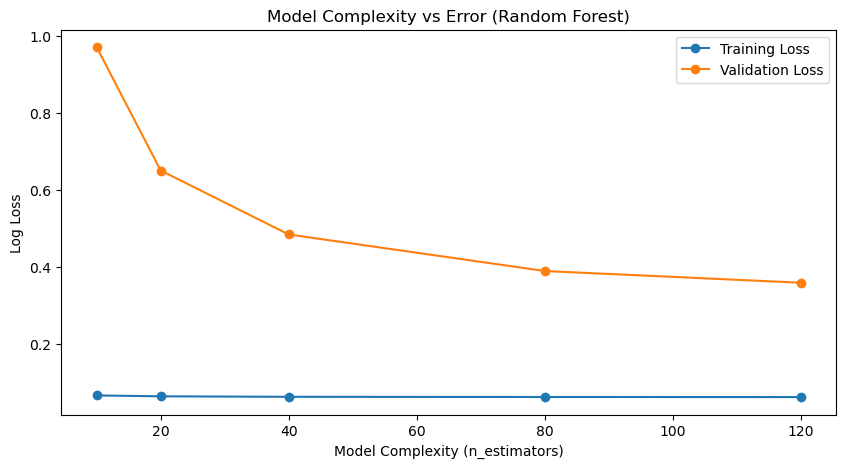

In [45]:
# Fast complexity curve for Random Forest (uses small subset)
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

# Ensure we have a small stratified subset ready
try:
    X_train_s, X_test_s, y_train_s, y_test_s
except NameError:
    sample_ratio = 0.01
    X_small, _, y_small, _ = train_test_split(
        X, y,
        train_size=sample_ratio,
        stratify=y,
        random_state=42
    )
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
        X_small, y_small,
        test_size=0.3,
        stratify=y_small,
        random_state=42
    )

n_estimators_range = [10, 20, 40, 80, 120]
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

for n in n_estimators_range:
    model = RandomForestClassifier(
        n_estimators=n,
        n_jobs=-1,
        random_state=42
    )

    model.fit(X_train_s, y_train_s)

    # Loss
    train_proba = model.predict_proba(X_train_s)
    test_proba  = model.predict_proba(X_test_s)
    train_losses_curve.append(log_loss(y_train_s, train_proba))
    test_losses_curve.append(log_loss(y_test_s, test_proba))

    # Accuracy
    y_train_pred = model.predict(X_train_s)
    y_test_pred  = model.predict(X_test_s)
    train_acc_curve.append(accuracy_score(y_train_s, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test_s, y_test_pred))

plt.figure(figsize=(10,5))
plt.plot(n_estimators_range, train_losses_curve, label="Training Loss", marker='o')
plt.plot(n_estimators_range, test_losses_curve, label="Validation Loss", marker='o')
plt.xlabel("Model Complexity (n_estimators)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Random Forest)")
plt.legend()
plt.show()

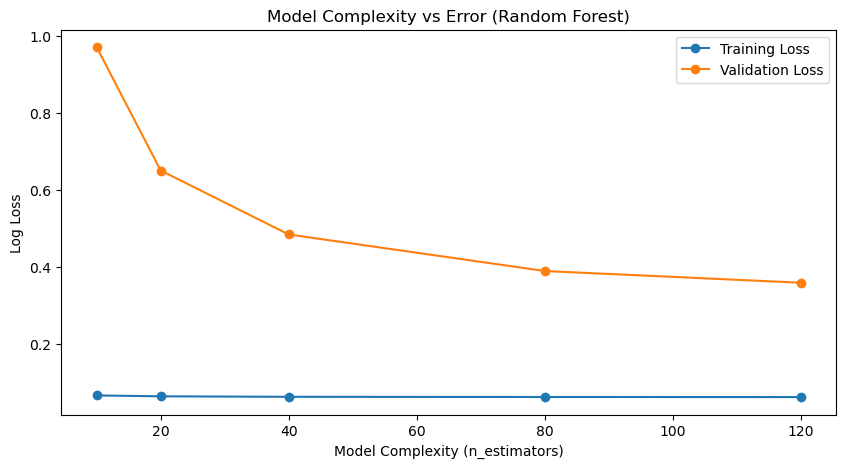

In [47]:
depths = range(2, 41, 2)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

for n in n_estimators_range:
    model = RandomForestClassifier(
        n_estimators=n,
        n_jobs=-1,
        random_state=42
    )

    model.fit(X_train_s, y_train_s)

    # Loss
    train_proba = model.predict_proba(X_train_s)
    test_proba  = model.predict_proba(X_test_s)
    train_losses_curve.append(log_loss(y_train_s, train_proba))
    test_losses_curve.append(log_loss(y_test_s, test_proba))

    # Accuracy
    y_train_pred = model.predict(X_train_s)
    y_test_pred  = model.predict(X_test_s)
    train_acc_curve.append(accuracy_score(y_train_s, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test_s, y_test_pred))

plt.figure(figsize=(10,5))
plt.plot(n_estimators_range, train_losses_curve, label="Training Loss", marker='o')
plt.plot(n_estimators_range, test_losses_curve, label="Validation Loss", marker='o')
plt.xlabel("Model Complexity (n_estimators)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Random Forest)")
plt.legend()
plt.show()

In [46]:
importance = rf_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)

,feature,importance
10,Weapon_Present,0.172708
5,Vict Descent,0.068568
4,Vict Sex,0.067705
87,MO_0344,0.057621
0,,0.051941
3,Vict Age,0.046278
76,MO_0416,0.045753
9,LON,0.038242
8,LAT,0.037920
2,Part 1-2,0.033652


### Perform a 5-Folds Cross Validation

In [50]:

from sklearn.model_selection import cross_val_score, KFold

# Create the model (same as your main model)
cv_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Define cross-validation strategy (5 folds, shuffle for randomness)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute CV scores (accuracy for each fold)
cv_scores = cross_val_score(cv_model, X, y, cv=kf, scoring="accuracy")

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Accuracy Scores: [0.9148354  0.91541209 0.91441208 0.91596931 0.91525786]
Mean CV Accuracy: 0.9151773501871687
Standard Deviation: 0.0005275143207739685
